In [ ]:
#First part
#Libraries
import scipy.io.wavfile as waves
import numpy as np
import matplotlib.pyplot as plt

#Code
file = 'Audio.wav'
fs, voice = waves.read(file)
voice = voice[:,0]
voice = voice - np.mean(voice)
voice = voice/float(np.max(np.abs(voice)))
time = np.arange(0, len(voice)/fs, 1.0/fs)
voice_segment = []
for i in range(0, len(voice)):
    if (time[i]>=1.8 and time[i]<=2.0):
        voice_segment.append(voice[i])
time_segment = np.arange(0, len(voice_segment)/fs, 1.0/fs)
autocor = np.correlate(voice_segment, voice_segment, mode='full')
t_ac_segvoz=np.arange(-(float(len(autocor))/fs)/2, (float(len(autocor))/fs)/2, 1.0/fs)

#PLots
plt.figure()
plt.subplot(3, 1, 1)
signal = plt.plot(time, voice, "-m")
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.legend(['Orginial Signal'], loc = 'upper right')
#plt.title('Signal Audio')
plt.grid()
plt.subplot(3, 1, 2)
segment = plt.plot(time_segment, voice_segment, "-r")
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.legend(['Segment Signal'], loc = 'upper right')
#plt.title('Segment Audio')
plt.grid()
plt.subplot(3, 1, 3)
plt.plot(t_ac_segvoz, autocor, "-k")
plt.ylabel('Amplitude')
plt.xlabel('Time (sec)')
plt.legend(['Autocorrelation'], loc = 'upper right')
#plt.title('Autocorrelation')
plt.grid()


In [ ]:
#Second part
#Libraries
import numpy as np
import matplotlib.pyplot as plt

#Code
def pulse(x, c, c0):
    if x>=(c+c0):
        r = 0.0
    elif x<=c0:
        r = 0.0
    else:
        r = 1
    return r
    
t = np.linspace(-10, 10, 1000)
width = t[550]-t[500] #Pulse width
init = t[500]
f = 1/width #Frequency
T = 1/f #Period
D = int((width/T))*100 #Dutty Cycle
print('The dutty cycle is:', D,'%')
plt.figure(1)
y = np.array([pulse(j, width, init) for j in t]) #Original signal
plt.plot(t, y, "-k")
plt.title('Original signal')
plt.grid()
plt.show()
plt.figure(2)
yatt = np.array([pulse(j, width/2, init) for j in t]) #Attenuated signal
yatts = np.roll(yatt, 200) #Attenuated and shifted signal
plt.plot(t, yatts, "-r")
plt.title('Attenuated signal')
plt.grid()
plt.show()
plt.figure(3)
mu, sigma = 0, 0.3 #Mean and standar deviation
noise = np.random.normal(mu, sigma, 1000) #Noise signal
result = yatts + noise
plt.plot(t, result, "-m")
plt.title('Completed signal')
plt.grid()
plt.show()
plt.figure(4)
correlate = np.correlate(y, result, mode='valid')
plt.plot(t, correlate, "-y")

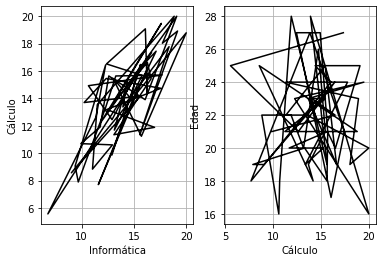

In [52]:
#Third part
#Libraries
import pandas as pd
import matplotlib.pyplot as plt

file = pd.read_excel('DatosCorrelacion.xlsx') #Read the file
#vector_columns = file.columns #Obtain file columns
age = file['Edad']
calculus_note = file['Nota calculo']
informatics_note = file['Nota informatica']

plt.subplot(1, 2, 1)
plt.plot(informatics_note, calculus_note, "-k") 
plt.ylabel('Cálculo')
plt.xlabel('Informática')
plt.grid()
plt.subplot(1, 2, 2)
plt.plot(calculus_note, age, "-k") 
plt.ylabel('Edad')
plt.xlabel('Cálculo')
plt.grid()

La gráfica de cálculo contra informática tiene una pendiente positiva por lo que la correlación debería ser mayor a uno.
La gráfica de edad contra cálculo sus datos se encuentran muy dispersos entre si, por lo que la correlación debería tender a cero.

In [53]:
from scipy import stats
# Coeficiente de correlación de Pearson
pear,pvalpe = stats.pearsonr(calculus_note, informatics_note)

# Coeficiente de correlación de Spearman
spear,pvalsp= stats.spearmanr(calculus_note, informatics_note)

print("Valores de correlación Notas calculo y Notas informática ")
print("Coeficiente Pearson = ",np.round(pear,3))
print("Coeficiente Spearman = ",np.round(spear,3))
print('\n')
# Coeficiente de correlación de Pearson
pear,pvalpe = stats.pearsonr(age, calculus_note)

# Coeficiente de correlación de Spearman
spear,pvalsp= stats.spearmanr(age, calculus_note)

print("Valores de correlación Edad y Notas calculo ")
print("Coeficiente Pearson = ",np.round(pear,3))
print("Coeficiente Spearman = ",np.round(spear,3))

Valores de correlación Notas calculo y Notas informática 
Coeficiente Pearson =  0.765
Coeficiente Spearman =  0.718


Valores de correlación Edad y Notas calculo 
Coeficiente Pearson =  0.016
Coeficiente Spearman =  0.029


11.
-Entre las dos materias los coeficientes de correlación son cercanos a la unidad por lo que se puede afirmar que tienen una correlación lineal positiva.
-Entre la edad y las notas de cálculo los coeficientes de correlación son cercanos a cero, entonces el grado de correlación lineal es muy bajo por lo que se puede afirmar que tienden a no tener una correlación lineal.

12.
-Los test estadísticos muestran una correlación lineal positiva casi perfecta y la no linealidad.
-El coeficiente de Spearman es una transformación del coeficiente de Pearson y este tiene la característica que no varía si se le aplica una transformación.
-No tienen consideraciones que las variables sean dependendientes o independientes.

CONCLUSIONES:
-Debido a que python es un lenguaje de programación interpretado tiene un amplia variedad de librerías para el tratamiento estadístico de fénomenos aleatorios.
-Se puede aproximar los sistemas analizados a una correlación lineal, además se puede usar métodos externos para mejorar el modelamiento lineal de un experimento.